In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans



In [212]:
# Get Year from UTC timestamp
def get_UTC_Year(ts):
 return(int(datetime.utcfromtimestamp(ts).strftime('%Y')))

# Year Separated from ‘title’
def get_year(title):
 year = title.strip()[-5:-1]
 try:
  return int(year)
 except ValueError as verr:
  return 1800

In [407]:
Rating_df = pd.read_csv('ratings.csv')
Movie_df = pd.read_csv('movies.csv')

In [408]:
Rating_df['year'] = Rating_df.apply(lambda x: get_UTC_Year(x['timestamp']),axis=1)
Movie_df['year'] = Movie_df.apply(lambda x: get_year(x['title']), axis=1)

In [409]:
Movie_genres_df = Movie_df['genres'].str.get_dummies('|')

In [410]:
Movie_genres_df.shape

(9742, 20)

In [411]:
Movie_df.shape

(9742, 4)

In [412]:
Movie_df =  Movie_df.join(Movie_genres_df, how='left')

In [17]:
dftmp = Movie_df[['movieId', 'year']].groupby('year')

In [18]:
MovieID_List = dftmp.movieId.nunique()

In [19]:
Year_List = dftmp.year.first()

In [20]:
dftmp = Rating_df [['rating', 'year']].groupby('year')

In [21]:
rating_List = dftmp.rating.count()

In [22]:
rating_List_new = pd.concat([Year_List, rating_List], axis=1).fillna(0)

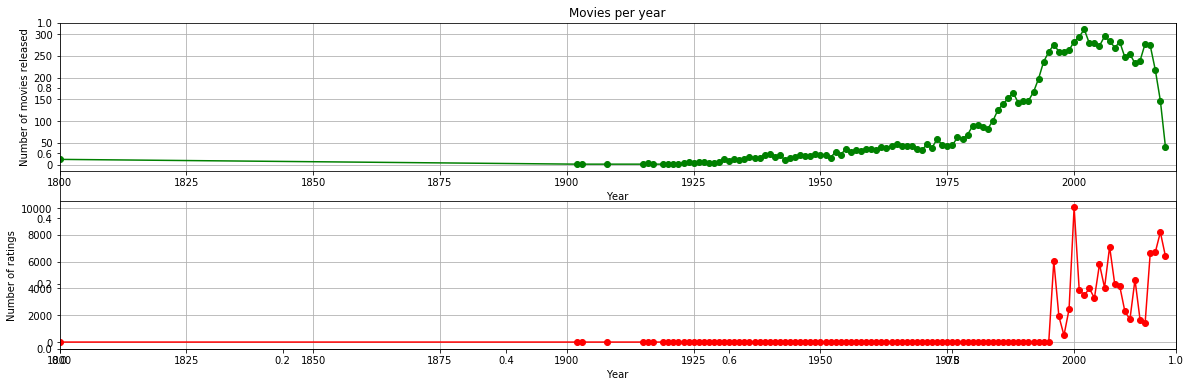

In [23]:
fig = plt.figure(figsize=(20,6))
plt.title('Movies per year')

ax1 = fig.add_subplot(2,1,1)
ax1.plot(Year_List, MovieID_List, "g-o")
ax1.grid(None)
ax1.set_xlim(xmin=1800, xmax=2020)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movies released')

ax2 = fig.add_subplot(2,1,2)
ax2.plot(Year_List, rating_List_new['rating'], "r-o")
ax2.grid(None)
ax2.set_xlim(xmin=1800, xmax=2020)
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of ratings')

plt.show()

In [24]:
genres_unique = list(Movie_genres_df)

In [30]:
dfG = pd.DataFrame()
for genre in genres_unique:
 dftmp = Movie_df [[genre]]
 dfG[genre]=dftmp.cumsum()

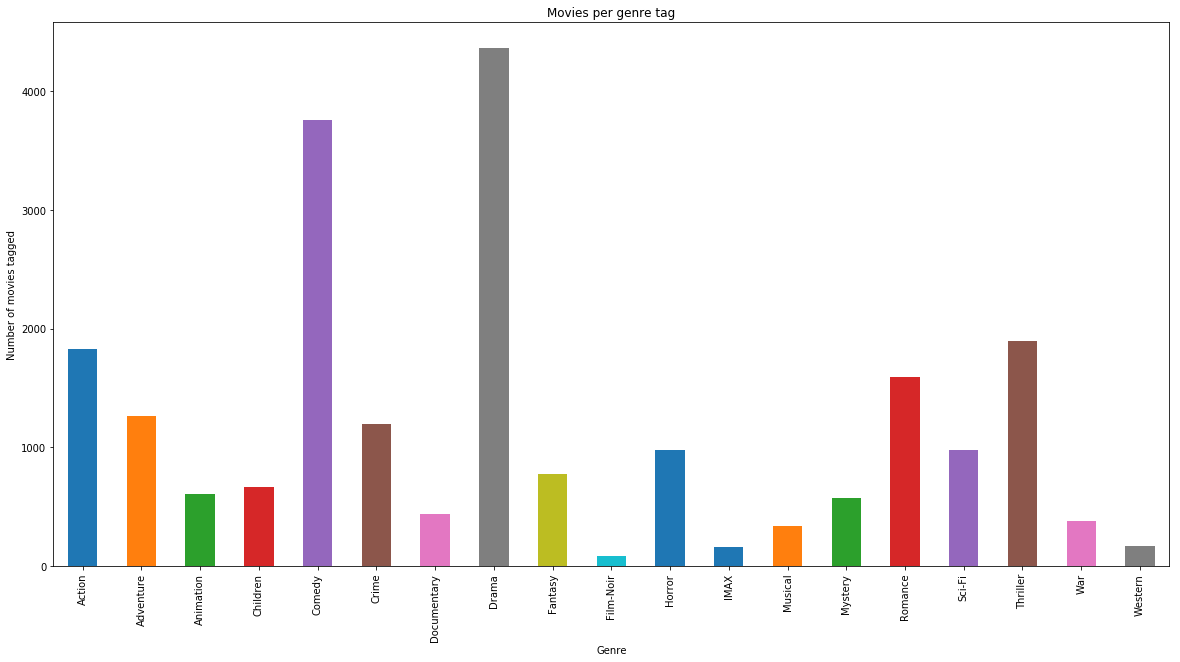

In [31]:
plt.figure(figsize=(20,10))
barlist = dfG.iloc[-1,1:].plot.bar()
plt.xticks(rotation='vertical')
plt.title('Movies per genre tag')
plt.xlabel('Genre')
plt.ylabel('Number of movies tagged')
plt.show()

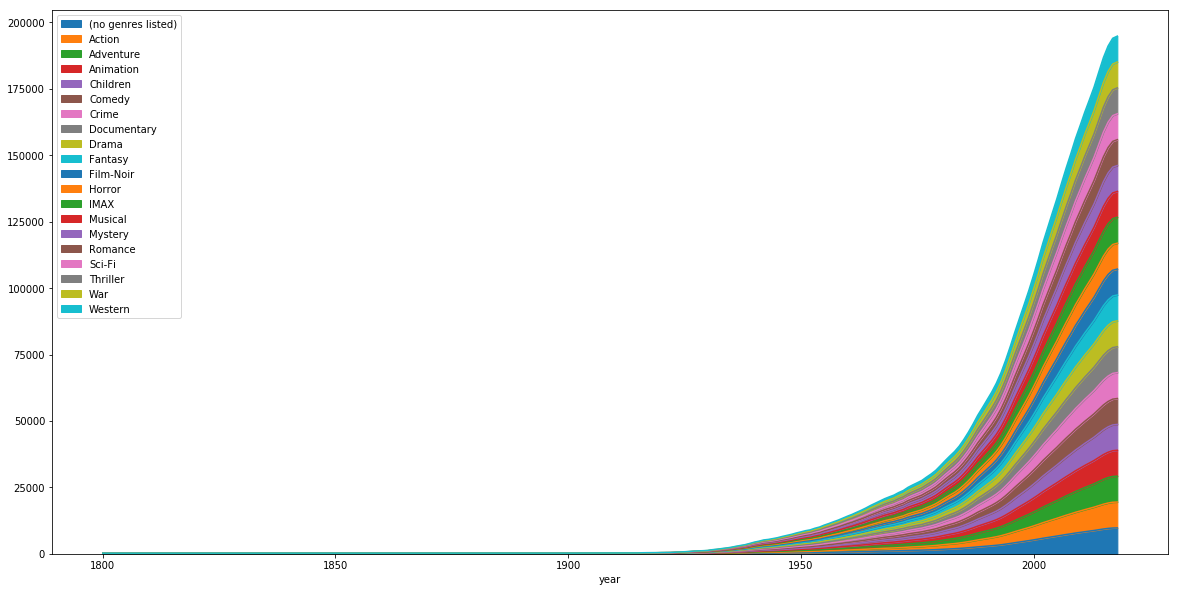

In [26]:
dfG = pd.DataFrame()
for genre in genres_unique:
 dftmp = Movie_df[['movieId', 'year',genre]].groupby('year')
 dfG[genre]=dftmp.movieId.nunique().cumsum()
dfG.loc[:,:].plot.area(stacked=True, figsize=(20,10))

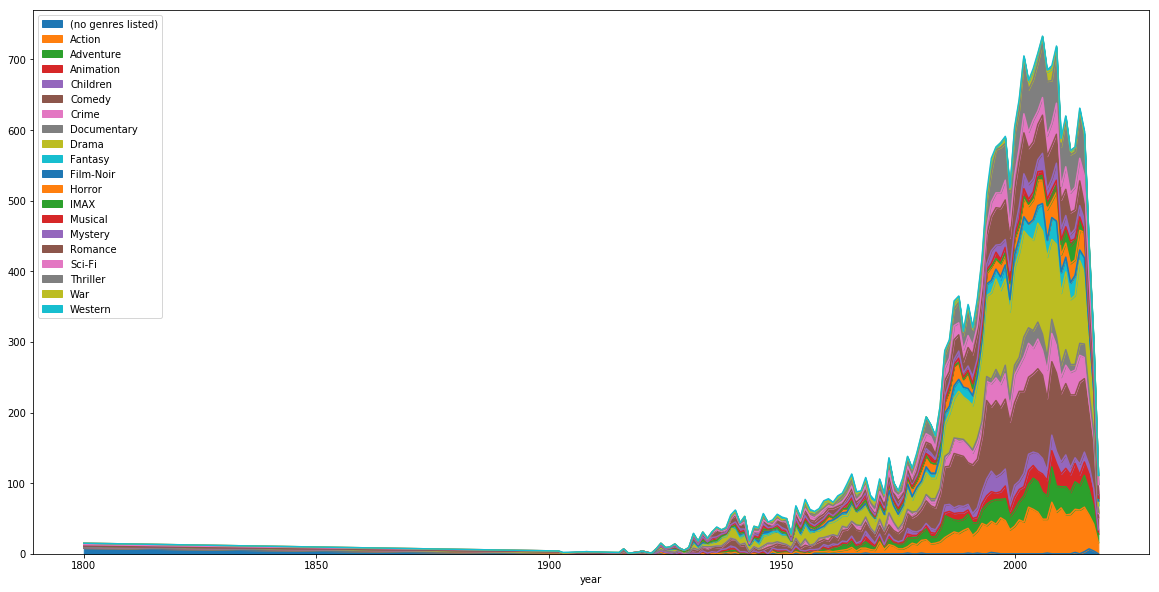

In [27]:
dfG = pd.DataFrame()
for genre in genres_unique:
 dfG[genre]= Movie_df[['year',genre]].groupby('year').sum()[genre]
dfG.loc[:,:].plot.area(stacked=True, figsize=(20,10))

In [28]:
dftmp=Rating_df [['movieId','rating']].groupby('movieId')
movie_rating_avg = dftmp.mean()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x042CC5F0>]], dtype=object)

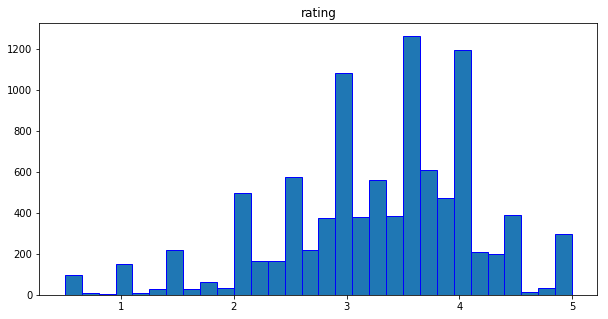

In [38]:
movie_rating_avg.hist(bins=30, grid=False, edgecolor='b', figsize=(10,5))

In [437]:
user_matrix = pd.pivot_table( Rating_df, index='userId', columns='movieId', values='rating')

In [438]:
user_matrix = user_matrix.fillna(0)

In [439]:
nUser = 10
user_sample = user_matrix.sample(n = nUser,random_state = 2)

In [440]:
v = cosine_similarity(user_sample)

In [441]:
cos_df = pd.DataFrame(v, columns=user_sample.index, index=user_sample.index)

In [442]:
user_sample

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,4.0,4.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305,0.0,3.5,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [443]:
cos_df

userId,433,276,305,85,110,409,482,523,423,237
userId,,,,,,,,,,
433,1.000000,0.000000,0.194766,0.029788,0.279558,0.096490,0.026884,0.119700,0.164790,0.073893
276,0.000000,1.000000,0.080077,0.007646,0.000000,0.015674,0.122909,0.066695,0.178087,0.014478
305,0.194766,0.080077,1.000000,0.042536,0.143613,0.143143,0.133543,0.194608,0.110885,0.159522
85,0.029788,0.007646,0.042536,1.000000,0.031740,0.015531,0.009615,0.039971,0.000000,0.000000
110,0.279558,0.000000,0.143613,0.031740,1.000000,0.147628,0.021932,0.072568,0.065941,0.074753
409,0.096490,0.015674,0.143143,0.015531,0.147628,1.000000,0.035316,0.010926,0.104220,0.058820
482,0.026884,0.122909,0.133543,0.009615,0.021932,0.035316,1.000000,0.042838,0.010368,0.054114
523,0.119700,0.066695,0.194608,0.039971,0.072568,0.010926,0.042838,1.000000,0.084052,0.118580
423,0.164790,0.178087,0.110885,0.000000,0.065941,0.104220,0.010368,0.084052,1.000000,0.097351


In [444]:
df = user_sample.T
df_ps = df.corr(method='pearson')

In [445]:
df_ps

userId,433,276,305,85,110,409,482,523,423,237
userId,,,,,,,,,,
433,1.000000,-0.002965,0.189480,0.027297,0.277298,0.092095,0.022035,0.116238,0.163024,0.070908
276,-0.002965,1.000000,0.065943,0.004094,-0.004527,0.008723,0.116878,0.061449,0.175697,0.010021
305,0.189480,0.065943,1.000000,0.029276,0.130244,0.119729,0.109976,0.178809,0.102674,0.146763
85,0.027297,0.004094,0.029276,1.000000,0.027945,0.009515,0.003606,0.035299,-0.002552,-0.003919
110,0.277298,-0.004527,0.130244,0.027945,1.000000,0.141131,0.014426,0.066846,0.062946,0.070166
409,0.092095,0.008723,0.119729,0.009515,0.141131,1.000000,0.023716,0.001368,0.099913,0.051571
482,0.022035,0.116878,0.109976,0.003606,0.014426,0.023716,1.000000,0.033676,0.005438,0.046887
523,0.116238,0.061449,0.178809,0.035299,0.066846,0.001368,0.033676,1.000000,0.080442,0.113154
423,0.163024,0.175697,0.102674,-0.002552,0.062946,0.099913,0.005438,0.080442,1.000000,0.094469


In [446]:
dfs = pd.DataFrame( index=list(df_ps), columns=[ 'maxsim_user', 'maxsim_value', 'minsim_user', 'minsim_value' ] )

In [447]:
for i in list(df_ps):
    tmp = df_ps.sort_values(i)[i]
    dfs.ix[i,'maxsim_user'] = tmp.index[nUser-2]
    dfs.ix[i,'maxsim_value'] = tmp.iloc[nUser-2]
    dfs.ix[i,'minsim_user'] = tmp.index[0]
    dfs.ix[i,'minsim_value'] = tmp.iloc[0]

In [448]:
dfs

,maxsim_user,maxsim_value,minsim_user,minsim_value
433,110,0.277298,276,-0.00296532
276,423,0.175697,110,-0.00452689
305,433,0.18948,85,0.0292755
85,523,0.0352991,237,-0.00391927
110,433,0.277298,276,-0.00452689
409,110,0.141131,523,0.00136807
482,276,0.116878,85,0.00360617
523,305,0.178809,409,0.00136807
423,276,0.175697,85,-0.00255215
237,305,0.146763,85,-0.00391927


In [450]:
rcmd_df = pd.DataFrame( index=list(df_ps), columns=[ 'recommend', 'not_recommend' ])

In [451]:
for i in list(df_ps):
    rcmd_user = dfs.loc[i,'maxsim_user']
    ncmd_user = dfs.loc[i,'minsim_user']
    
    rcmd_movie_id = user_sample.loc[ rcmd_user , : ].sort_values().index[-1]
    ncmd_movie_id = user_sample.loc[ ncmd_user , : ].sort_values().index[-1]
    
    rcmd_df.ix[ i , 'recommend' ] = Movie_df.loc[Movie_df['movieId'] == rcmd_movie_id]['title'].iloc[0]
    rcmd_df.ix[ i , 'not_recommend' ] = Movie_df.loc[Movie_df['movieId'] == ncmd_movie_id]['title'].iloc[0]

In [356]:
rcmd_df

,recommend,not_recommend
433,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Black Sheep (1996)
276,Gattaca (1997),"Amelie (Fabuleux destin d'Amélie Poulain, Le) ..."
305,My Big Fat Greek Wedding (2002),Lamerica (1994)
85,I Am Legend (2007),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
110,My Big Fat Greek Wedding (2002),Black Sheep (1996)
409,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",I Am Legend (2007)
482,Black Sheep (1996),Lamerica (1994)
523,"Bridge on the River Kwai, The (1957)",Taxi Driver (1976)
423,Black Sheep (1996),Lamerica (1994)
237,"Bridge on the River Kwai, The (1957)",Lamerica (1994)


In [418]:
movie_matrix = Movie_df.drop(['title','genres','year'],axis=1).set_index('movieId')

In [541]:
nGenres = 5
movie_sample = movie_matrix.sample(n=nGenres, random_state=2)

In [542]:
v = cosine_similarity(movie_sample)
cos_df = pd.DataFrame(v, columns=movie_sample.index, index=movie_sample.index)

In [543]:
cos_df

movieId,109846,3974,1281,1731,112623
movieId,,,,,
109846,1.000000,0.408248,0.333333,0.57735,0.0
3974,0.408248,1.000000,0.000000,0.00000,0.0
1281,0.333333,0.000000,1.000000,0.57735,0.0
1731,0.577350,0.000000,0.577350,1.00000,0.0
112623,0.000000,0.000000,0.000000,0.00000,1.0


In [544]:
df_ps = movie_sample.T.corr(method = 'pearson')

In [545]:
df_ps

movieId,109846,3974,1281,1731,112623
movieId,,,,,
109846,1.000000,0.326732,0.215686,0.546119,-0.096374
3974,0.326732,1.000000,-0.140028,-0.076472,-0.076472
1281,0.215686,-0.140028,1.000000,0.546119,-0.096374
1731,0.546119,-0.076472,0.546119,1.000000,-0.052632
112623,-0.096374,-0.076472,-0.096374,-0.052632,1.000000


In [546]:
dfs = pd.DataFrame( index=list(df_ps), columns=[ 'maxsim_movie', 'maxsim_value', 'minsim_movie', 'minsim_value' ] )

for i in list(df_ps):
    tmp = df_ps.sort_values(i)[i]
    dfs.ix[i,'maxsim_movie'] = tmp.index[nGenres-2]
    dfs.ix[i,'maxsim_value'] = tmp.iloc[nGenres-2]
    dfs.ix[i,'minsim_movie'] = tmp.index[0]
    dfs.ix[i,'minsim_value'] = tmp.iloc[0]

In [547]:
dfs

,maxsim_movie,maxsim_value,minsim_movie,minsim_value
109846,1731,0.546119,112623,-0.0963739
3974,109846,0.326732,1281,-0.140028
1281,1731,0.546119,3974,-0.140028
1731,1281,0.546119,3974,-0.0764719
112623,1731,-0.0526316,1281,-0.0963739


In [548]:
 rcmd_df = pd.DataFrame( index=list(df_ps), columns=[ 'User','recommend'])

In [549]:
for i in list(df_ps):
    rcmd_movie_id = dfs.loc[i,'maxsim_movie']
    rcmd_df.ix[ i , 'recommend' ] = Movie_df.loc[Movie_df['movieId'] == rcmd_movie_id]['title'].iloc[0]
    rcmd_df.ix[ i , 'User' ] =  list(Rating_df.loc[ (Rating_df['movieId'] == i) & (Rating_df['rating'] > 3)]['userId'])

In [550]:
rcmd_df

,User,recommend
109846,"[119, 382, 483]",Mr. Magoo (1997)
3974,[],Mr. Peabody & Sherman (2014)
1281,"[50, 105, 110, 182, 318, 380, 385, 391, 420, 4...",Mr. Magoo (1997)
1731,[],"Great Dictator, The (1940)"
112623,"[125, 249, 256, 380, 414, 462, 511, 561, 610]",Mr. Magoo (1997)
